<a href="https://colab.research.google.com/github/abhipise2704/Vanna_Anthropic/blob/main/Anthropic_AI_Vanna_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install anthropic

In [ ]:
# !pip install anthropic

In [ ]:
%pip install 'vanna[chromadb]'

In [ ]:
from vanna.base import VannaBase
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore
import anthropic
import json
from anthropic import HUMAN_PROMPT, AI_PROMPT

In [ ]:
class MyCustomLLM(VannaBase):
  def __init__(self, config=None):
    self.client = anthropic.Anthropic(
    api_key=api_key
    )
    pass
  def system_message(self, message: str) -> any:
    return {"role": "system", "content": message}

  def user_message(self, message: str) -> any:
    return {"role": "user", "content": message}

  def assistant_message(self, message: str) -> any:
    return {"role": "assistant", "content": message}

  def generate_sql(self, question: str, **kwargs) -> str:
    sql = super().generate_sql(question, **kwargs)
    sql = sql.replace("\\_", "_")
    return sql

  def submit_prompt(self, prompt, **kwargs) -> str:
    message = self.client.completions.create(
    model="claude-2.1",
    max_tokens_to_sample=4000,
    prompt=f"{HUMAN_PROMPT} {prompt}{AI_PROMPT}")
    return json.loads(message.json())['completion']


class MyVanna(ChromaDB_VectorStore, MyCustomLLM):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        MyCustomLLM.__init__(self, config=config)

vn = MyVanna()

In [ ]:
vn.connect_to_sqlite('/content/Chinook.sqlite')
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

for ddl in df_ddl['sql'].to_list():
  vn.train(ddl=ddl)

Adding ddl: CREATE TABLE [Album]
(
    [AlbumId] INTEGER  NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),
    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE [Artist]
(
    [ArtistId] INTEGER  NOT NULL,
    [Name] NVARCHAR(120),
    CONSTRAINT [PK_Artist] PRIMARY KEY  ([ArtistId])
)
Adding ddl: CREATE TABLE [Customer]
(
    [CustomerId] INTEGER  NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    CONSTRAINT [PK_Customer] PRIMARY KEY  ([CustomerId]),
    FOREIGN KEY ([SupportRepId]) REFERENCES [Employee] ([Emp

[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE INDEX [IFK_AlbumArtistId] ON [Album] ([ArtistId])\n\nCREATE INDEX [IFK_AlbumArtistId] ON [Album] ([ArtistId])\n\nCREATE INDEX [IFK_AlbumArtistId] ON [Album] ([ArtistId])\n\nCREATE TABLE [Track]\n(\n    [TrackId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(200)  NOT NULL,\n    [AlbumId] INTEGER,\n    [MediaTypeId] INTEGER  NOT NULL,\n    [GenreId] INTEGER,\n    [Composer] NVARCHAR(220),\n    [Milliseconds] INTEGER  NOT NULL,\n    [Bytes] INTEGER,\n    [UnitPrice] NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT [PK_Track] PRIMARY KEY  ([TrackId]),\n    FOREIGN KEY ([AlbumId]) REFERENCES [Album] ([AlbumId]) \n\t\tON 

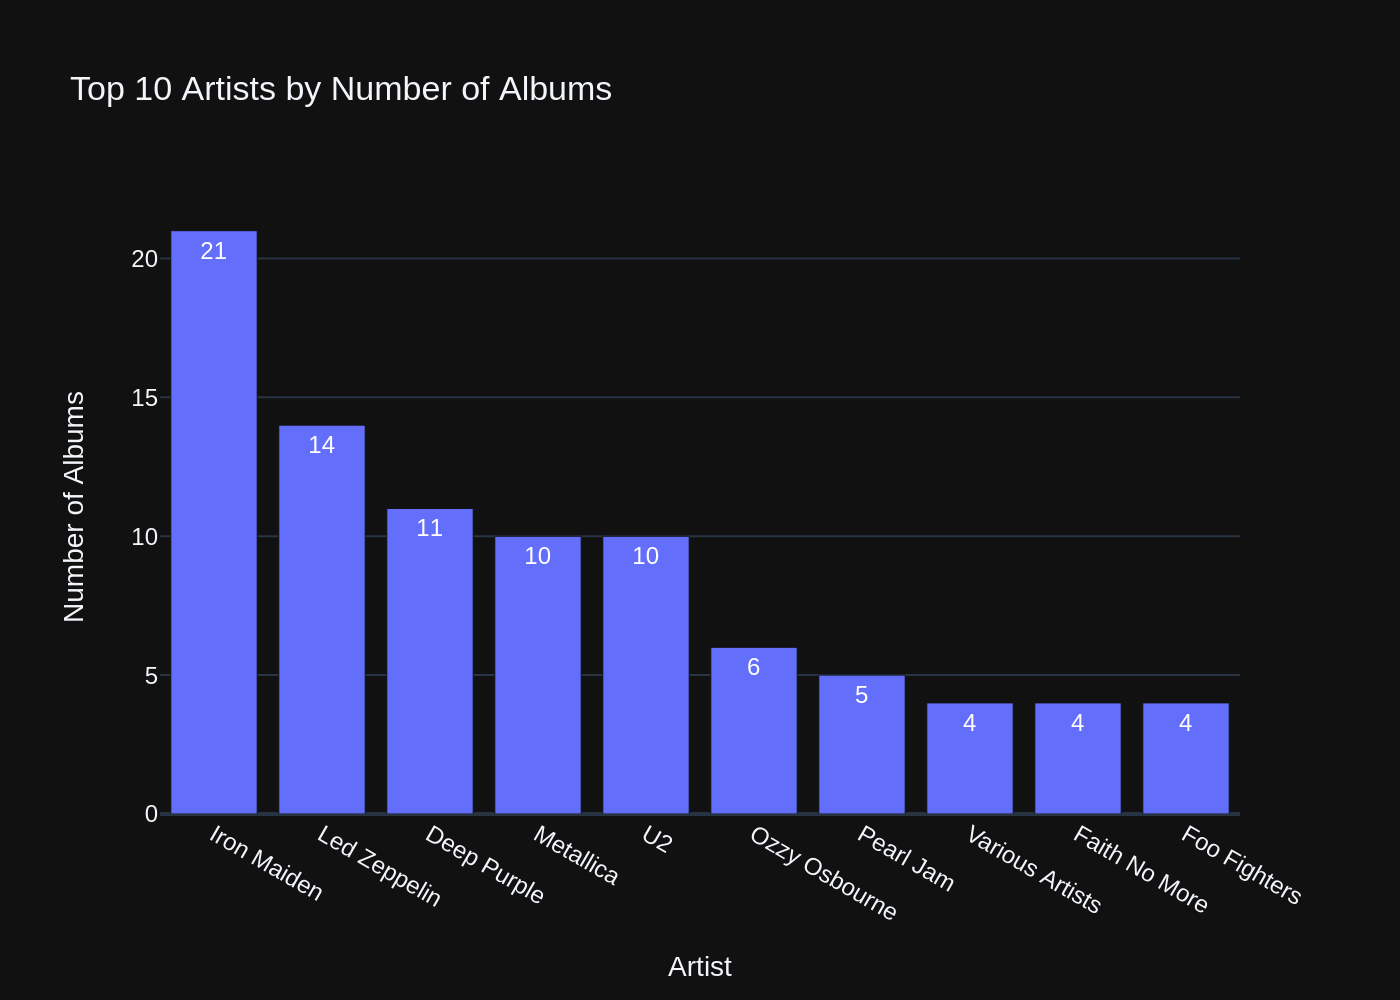

(' SELECT a.ArtistId, a.Name, COUNT(b.AlbumId) AS NumAlbums\nFROM Artist a \nJOIN Album b ON a.ArtistId = b.ArtistId\nGROUP BY a.ArtistId, a.Name\nORDER BY NumAlbums DESC\nLIMIT 10',
    ArtistId             Name  NumAlbums
 0        90      Iron Maiden         21
 1        22     Led Zeppelin         14
 2        58      Deep Purple         11
 3        50        Metallica         10
 4       150               U2         10
 5       114    Ozzy Osbourne          6
 6       118        Pearl Jam          5
 7        21  Various Artists          4
 8        82    Faith No More          4
 9        84     Foo Fighters          4,
 None)

In [ ]:
vn.ask("Top 10 artists by the number of albums?",allow_llm_to_see_data=True)

In [ ]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()

<IPython.core.display.Javascript object>

Your app is running at:
https://4kodnqmxuid-496ff2e9c6d22116-8084-colab.googleusercontent.com/
 * Serving Flask app 'vanna.flask'
 * Debug mode: off


[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE INDEX [IFK_AlbumArtistId] ON [Album] ([ArtistId])\n\nCREATE INDEX [IFK_AlbumArtistId] ON [Album] ([ArtistId])\n\nCREATE INDEX [IFK_AlbumArtistId] ON [Album] ([ArtistId])\n\nCREATE TABLE [Track]\n(\n    [TrackId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(200)  NOT NULL,\n    [AlbumId] INTEGER,\n    [MediaTypeId] INTEGER  NOT NULL,\n    [GenreId] INTEGER,\n    [Composer] NVARCHAR(220),\n    [Milliseconds] INTEGER  NOT NULL,\n    [Bytes] INTEGER,\n    [UnitPrice] NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT [PK_Track] PRIMARY KEY  ([TrackId]),\n    FOREIGN KEY ([AlbumId]) REFERENCES [Album] ([AlbumId]) \n\t\tON 

[{'role': 'system', 'content': 'The user provides a question and you provide SQL. You will only respond with SQL code and not with any explanations.\n\nRespond with only SQL code. Do not answer with any explanations -- just the code.\n\nYou may use the following DDL statements as a reference for what tables might be available. Use responses to past questions also to guide you:\n\nCREATE INDEX [IFK_AlbumArtistId] ON [Album] ([ArtistId])\n\nCREATE INDEX [IFK_AlbumArtistId] ON [Album] ([ArtistId])\n\nCREATE INDEX [IFK_AlbumArtistId] ON [Album] ([ArtistId])\n\nCREATE TABLE [Track]\n(\n    [TrackId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(200)  NOT NULL,\n    [AlbumId] INTEGER,\n    [MediaTypeId] INTEGER  NOT NULL,\n    [GenreId] INTEGER,\n    [Composer] NVARCHAR(220),\n    [Milliseconds] INTEGER  NOT NULL,\n    [Bytes] INTEGER,\n    [UnitPrice] NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT [PK_Track] PRIMARY KEY  ([TrackId]),\n    FOREIGN KEY ([AlbumId]) REFERENCES [Album] ([AlbumId]) \n\t\tON 